## Natural Language Processing
### 1 >>> importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2 >>> importing data

In [2]:
data = pd.read_csv('Data for NLP.tsv',delimiter= '\t',quoting=3)
print(data)
# delimiter says that the data is seperated using tab space in our data
# quoting=3 remove any quotes in our data

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


### 3 >>> importing all NLP libraries

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

### cleaning the text (pre-processing the text)

In [4]:
corpus = []  # creating empty list
for i in range(0,1000): # running for each and every review
    review = data['Review'][i] #storing in a variable
    review = review.lower()   # converting lo lower case     
    
    # substituting all the available shortcuts in our document
    review = re.sub(r"i'm", "i am", review)
    review = re.sub(r"\'ll", " will", review)  
    review = re.sub(r"\'ve", " have", review)  
    review = re.sub(r"\'re", " are", review)
    review = re.sub(r"\'d", " would", review)
    review = re.sub(r"\'ve", " have", review)
    review = re.sub(r"won't", "will not", review)
    review = re.sub(r"don't", "do not", review)
    review = re.sub(r"did't", "did not", review)
    review = re.sub(r"can't", "can not", review)
    review = re.sub(r"it's", "it is", review)
    
    # substituting unwanted characters with space
    review = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", review)
    tokens = word_tokenize(review)  # splitting to each word
    # allowing only alphabets
    words = [word for word in tokens if word.isalpha()]
    
    stop_words = set(stopwords.words("english"))  #including stopwords
    stop_words.discard("not")  # removing 'not' from stopwords as it is iump for our review
    PS = PorterStemmer()  # creating oject for PorterStemmer
    
    # appling stemming on each word after removing the stop words
    words = [PS.stem(w) for w in words if not w in stop_words]  
    words = ' '.join(words)  # jong the words with spaces
    corpus.append(words)  # adding all the words to list we created

In [5]:
corpus[0:20]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like']

### 4 >>> creating bag of words

### A: Countervector

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1580)   
xc = cv.fit_transform(corpus).toarray()  
yc = data.iloc[0:,1].values
print(np.shape(xc))
print(np.shape(yc))

(1000, 1580)
(1000,)



### B: TF-IDF  (Term Frequency - Inverse Document Frequency)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
TV = TfidfVectorizer(min_df=2,max_features=400)   
xt = TV.fit_transform(corpus).toarray()
yt = data.iloc[:,1].values
print(np.shape(xt))
print(np.shape(yt))

(1000, 400)
(1000,)


## 5 >>> SVM
### 5a >>> Spliting the data into "test_data" and "train_data"

In [8]:
from sklearn.model_selection import train_test_split
Xt_train,Xt_test,yt_train,yt_test = train_test_split(xt,yt,test_size = 0.2,random_state = 18)

### 5b >>> Training model with  SVM

SVM Accuracy Score ->  84.5
[[76  8]
 [23 93]]


Text(0.5, 1.0, 'Confusion Matrix')

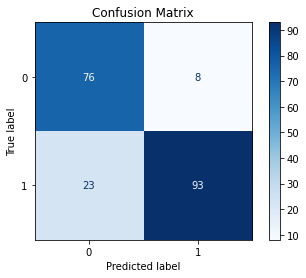

In [9]:
from sklearn.svm import SVC

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
svcls = SVC(  kernel='linear', gamma = 'auto',random_state=18)
svcls.fit(Xt_train,yt_train)

# predict the labels on validation dataset
y_pred_SVM = svcls.predict(Xt_test)

# Use accuracy_score function to get the accuracy
score_SVM = accuracy_score(y_pred_SVM, yt_test)*100
print("SVM Accuracy Score -> ",score_SVM)

# print Confusion matrix
print(confusion_matrix(yt_test,y_pred_SVM))
plot_confusion_matrix(svcls,Xt_test,yt_test,cmap=plt.cm.Blues).ax_.set_title('Confusion Matrix')

### 5c >>> Plotting reviews of test values and predicted values

In [10]:
pred_te0 = yt_test[yt_test==0]
pred_te1 = yt_test[yt_test==1]
slices0 = [len(pred_te0),len(pred_te1)]

pred0 = y_pred_SVM[y_pred_SVM==0]
pred1 = y_pred_SVM[y_pred_SVM==1]
slices1 = [len(pred0),len(pred1)]

values = ['Not Liked   ', 'Liked']

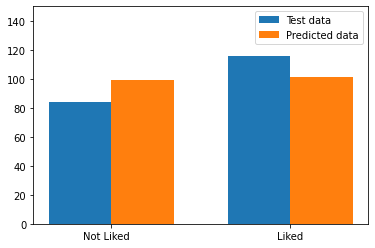

In [11]:
index = np.arange(len(values))
width = 0.35
fig,ax = plt.subplots()
test = ax.bar(index-width/2,slices0,width,label='Test data')
pred = ax.bar(index+width/2,slices1,width,label='Predicted data')

ax.set_xticks(index)
ax.set_xticklabels(values)
plt.ylim(0,150)

ax.legend()
plt.show()

## 6 >>> KNN
### 6a >>> Spliting the data into "test_data" and "train_data"

In [12]:
from sklearn.model_selection import train_test_split
Xc_train,Xc_test,yc_train,yc_test = train_test_split(xc,yc,test_size = 0.2,random_state = 18)

### 6b >>> Training model with  KNN

KNN Accuracy Score ->  80.0
[[73 11]
 [29 87]]


Text(0.5, 1.0, 'Confusion Matrix')

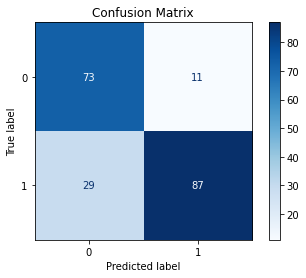

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier - Algorithm - KNN
# fit the training dataset on the classifier
KNNcls = KNeighborsClassifier(n_neighbors= 3)
KNNcls.fit(Xc_train,yc_train)

# predict the labels on validation dataset
y_pred_KNN = KNNcls.predict(Xc_test)

# Use accuracy_score function to get the accuracy
score_KNN = accuracy_score(y_pred_KNN, yt_test)*100
print("KNN Accuracy Score -> ",score_KNN)

# print Confusion matrix
print(confusion_matrix(yc_test,y_pred_KNN))
plot_confusion_matrix(KNNcls,Xc_test,yc_test,cmap=plt.cm.Blues).ax_.set_title('Confusion Matrix')

### 6c >>> Plotting reviews of test values and predicted values


In [14]:
pred_te0 = yc_test[yc_test==0]
pred_te1 = yc_test[yc_test==1]
slices0 = [len(pred_te0),len(pred_te1)]

pred0 = y_pred_KNN[y_pred_KNN==0]
pred1 = y_pred_KNN[y_pred_KNN==1]
slices1 = [len(pred0),len(pred1)]

values = ['Not Liked   ', 'Liked']

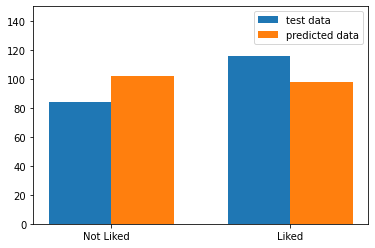

In [15]:
index = np.arange(len(values))
width = 0.35
fig,ax = plt.subplots()
test = ax.bar(index-width/2,slices0,width,label='test data')
pred = ax.bar(index+width/2,slices1,width,label='predicted data')

ax.set_xticks(index)
ax.set_xticklabels(values)
plt.ylim(0,150)

ax.legend()
plt.show()

## 7 >>> PCA with SVM
### 7a >>> Spliting the data into "test_data" and "train_data"

In [16]:
from sklearn.model_selection import train_test_split
Xc_train,Xc_test,yc_train,yc_test = train_test_split(xc,yc,test_size = 0.2,random_state = 18)

### 7b >>> Training model with PCA with SVM

PCA Accuracy Score ->  85.0
[[78  6]
 [24 92]]


Text(0.5, 1.0, 'Confusion Matrix')

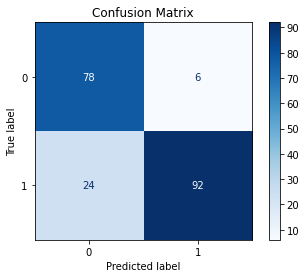

In [17]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# in the starting since we do not know the eigenveactors values we put n_components = None
# to get the explained_variance vector chich shows us the max varaince of all the features
# after we confirm the significant features change the value of n_components to the that particlur value
pca = PCA(n_components=330)
Xt_train = pca.fit_transform(Xt_train)
Xt_test = pca.transform(Xt_test)
explained_variance = pca.explained_variance_ratio_
np.set_printoptions( suppress=True)
# print(explained_variance)

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
svcls = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svcls.fit(Xt_train,yt_train)

# predict the labels on validation dataset
y_pred_PCA = svcls.predict(Xt_test)

# Use accuracy_score function to get the accuracy
score_PCA = accuracy_score(y_pred_PCA, yt_test)*100
print("PCA Accuracy Score -> ",score_PCA)

# print Confusion matrix
print(confusion_matrix(yt_test,y_pred_PCA))
plot_confusion_matrix(svcls,Xt_test,yt_test,cmap=plt.cm.Blues).ax_.set_title('Confusion Matrix')

### 7c >>> Plotting reviews of test values and predicted values

In [18]:
pred0 = yt_test[yt_test==0]
pred1 = yt_test[yt_test==1]
slices0 = [len(pred0),len(pred1)]

pred0 = y_pred_PCA[y_pred_PCA==0]
pred1 = y_pred_PCA[y_pred_PCA==1]
slices1 = [len(pred0),len(pred1)]

values = ['Not Liked   ', 'Liked']

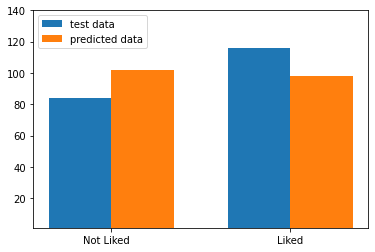

In [19]:
index = np.arange(len(values))
width = 0.35
fig,ax = plt.subplots()
test = ax.bar(index-width/2,slices0,width,label='test data')
pred = ax.bar(index+width/2,slices1,width,label='predicted data')

ax.set_xticks(index)
ax.set_xticklabels(values)
plt.ylim(1,140)
ax.legend()
plt.show()

### 8 >>> Plotting top 20 unigrams and bigrams Countervector

food 126
place 106
good 95
service 85
great 70
like 46
time 42
really 36
just 35
best 30
friendly 27
don 26
restaurant 25
nice 25
amazing 24
delicious 23
ve 23
vegas 22
did 22
pretty 20


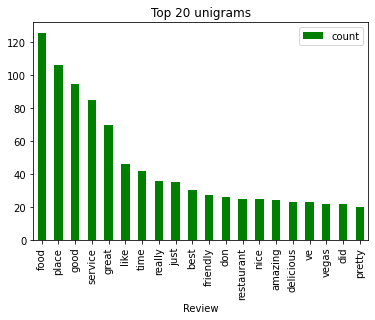

In [20]:
def get_top_n_words(corpus, n=None):
    cv = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['Review'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Review' , 'count'])
df1.plot(kind='bar',x='Review',y='count',color='green',title="Top 20 unigrams")

great food 8
good food 8
food good 7
great service 6
food service 6
really good 6
customer service 6
great place 6
food delicious 5
food great 5
anytime soon 5
friendly staff 4
feel like 4
bad food 4
10 minutes 4
don know 4
waste time 4
zero stars 4
won going 4
don think 4


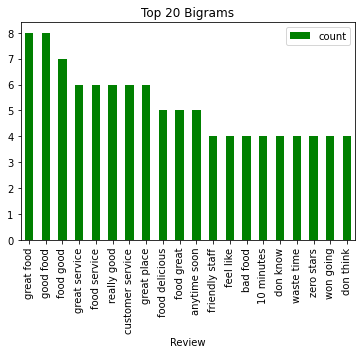

In [21]:
def get_top_n_bigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['Review'], 20)
for word, freq in common_words:
    print(word, freq)
df2= pd.DataFrame(common_words, columns = ['Review' , 'count'])
df2.plot(kind='bar',x='Review',y='count',color='green',title="Top 20 Bigrams")

### 9 >>> score comparison

In [22]:
score = {'Classifier':["SVM", "KNN", "PCA with SVM"], "Accuracy":[score_SVM,score_KNN,score_PCA]}
df = pd.DataFrame(score, columns = ["Classifier", "Accuracy"], index = [1,2,3])
df

,Classifier,Accuracy
1,SVM,84.5
2,KNN,80.0
3,PCA with SVM,85.0
